In [3]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import xeofs as xe
from src.loading import *
from src.saving import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# gSAM EOFs

In [ ]:
# Get coarse files
#
w = load_coarse_gsam_w()
rho = load_reference_profiles().rho
mass_flux = w * rho

In [15]:
# Compute EOFs and PCs using XEOFs package
#
model = xe.single.EOF(n_modes=10, center=False)
model.fit(mass_flux, ('lat', 'lon', 'time'))

In [16]:
# Save the outputs
#
save_path = get_project_data_dir() + f'gsam_coarse_eofs_pcs.nc'
model.save(save_path, engine='netcdf4')

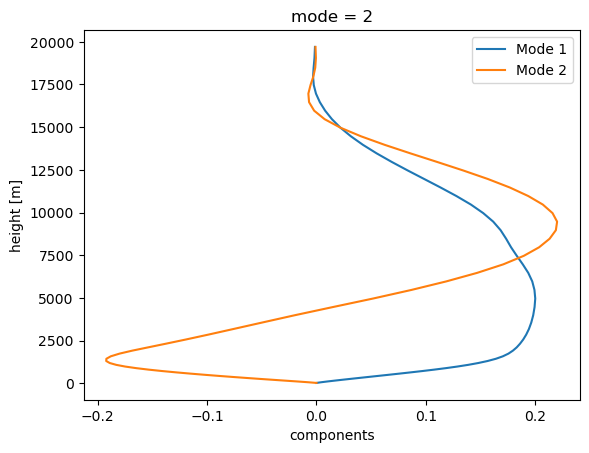

In [ ]:
# Vertify that the model is ok
loaded_model = xe.single.EOF.load(save_path, engine='netcdf4')
loaded_model.components().sel(mode=1).plot(y='z', label='Mode 1')
loaded_model.components().sel(mode=2).plot(y='z', label='Mode 2')
plt.legend()

# ERA5 EOFs

In [5]:
# Get coarse files
#
w = load_coarse_era5_w()
mass_flux = -(1/9.81) * w

In [7]:
# Compute EOFs and PCs using XEOFs package
#
model = xe.single.EOF(n_modes=10, center=False)
model.fit(mass_flux, ('latitude', 'longitude', 'time'))

In [8]:
# Save the outputs
#
save_path = get_project_data_dir() + f'era5_coarse_eofs_pcs.nc'
model.save(save_path, engine='netcdf4')

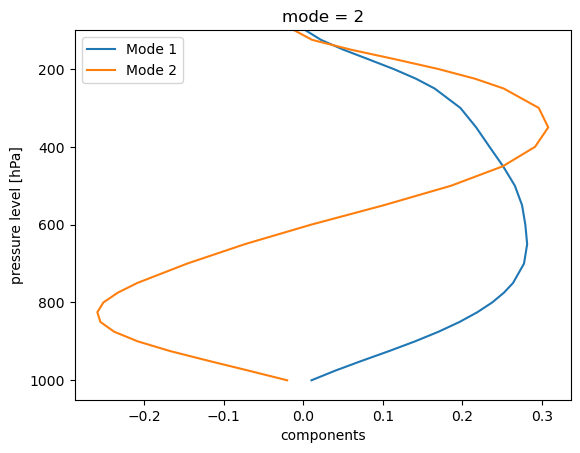

In [13]:
# Vertify that the model is ok
loaded_model = xe.single.EOF.load(save_path, engine='netcdf4')
loaded_model.components().sel(mode=1).plot(y='level', label='Mode 1')
loaded_model.components().sel(mode=2).plot(y='level', label='Mode 2')
plt.gca().invert_yaxis()
plt.ylim(None, 100)
plt.legend()